In this, Jupyter notebook, I used the titanic dataset in seaborn. I used basic and known machine learnin methods to predict the survival of passengers in titanic. In class we have done with decision tree and random forest when the data was scaled. So I decided to check does really help us? The answer, yes it does slightly. Table 1 shows ML models without scaled, Table 2 shows with ML models with scaling, Table 3 shows ML models with scaled data set and grid search.

Table of Contents
1. Import Libraries
2. Data Sets
3. Data Analysis
4. Data Prepocessing
    1. Handling Missing Values
    2. Converting categorical variables to numeric variables. 
5. Applying Machine Learning models to the data without scaling
    1. Decision Tree
    2. Logistic Regression
    3. Random Forest
    4. Stochastic Gradient Descent
    5. KNN
    6. Gaussian Naive Bayes
    7. Perceptron
    8. SVM
    9. Linear SVM
    10. Adaptive Boosting
    11. XGBoost
    12. Which Model is the best? Table 1
6. Applying Machine Learning models to the data with scaling
    1. Decision Tree
    2. Logistic Regression
    3. Random Forest
    4. Stochastic Gradient Descent
    5. KNN
    6. Gaussian Naive Bayes
    7. Perceptron
    8. SVM
    9. Linear SVM
    10. Adaptive Boosting
    11. XGBoost
    12. Which Model is the best ? Table 2  
7. ROC Curve for RF and Logistic Regression
8. Hyperparameter tuning with Grid Search and Randomized Search
9. A few models with the grid search
    1. SVM
    2. Linear SVM
    3. Logistic Regression
    4. SGD
    5. Decision Tree
    6. Random Forest
    7. KNN
    8. Ada Boost
    9. XG Boost
    10. Cat Boost
    11. Light GBM
    12. Which Model is the best ? Table 3  
    


## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgb

/Users/sergazy/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [3]:
# For data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# All the models we will apply
from sklearn import linear_model


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [4]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Datasets


### Several datasets built into seaborn.

In [5]:
sns.get_dataset_names()

/Users/sergazy/anaconda3/lib/python3.7/site-packages/seaborn/utils.py:376: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 376 of the file /Users/sergazy/anaconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [6]:
# We will use this data
titanic = sns.load_dataset('titanic')
titanic.head(15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## Data Analysis

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [9]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

By looking here, we can get rid off deck and age variable because there are many missing. Embarked only 2 is missing so that can be filled.

In [10]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

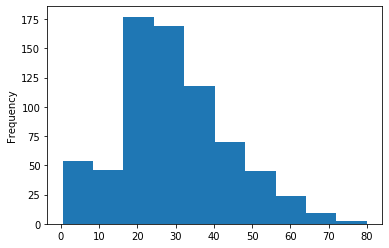

In [11]:
titanic['age'].plot(kind = 'hist')

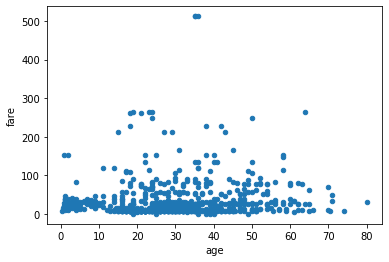

In [12]:
titanic.plot(kind = 'scatter',x = 'age',y = 'fare')

Let us see survival according to the who variable.

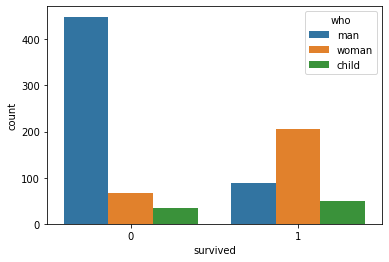

In [13]:
sns.countplot(data = titanic, x = 'survived', hue = 'who')

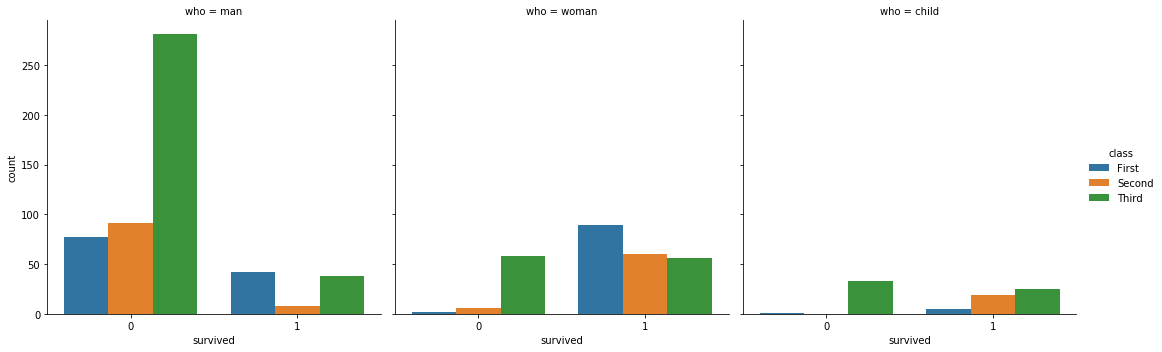

In [14]:
sns.catplot(data = titanic, x = 'survived', hue = 'class', kind = 'count', col = 'who')

### Survival according to fare and class

These histogram show that women and children have higher chance of survival.

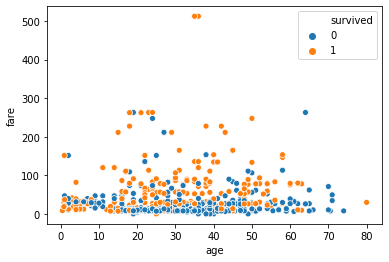

In [15]:
sns.scatterplot(x = 'age',y = 'fare', data =titanic,hue = 'survived')

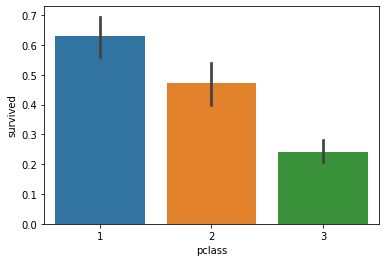

In [16]:
sns.barplot(x = 'pclass',y = 'survived', data = titanic)

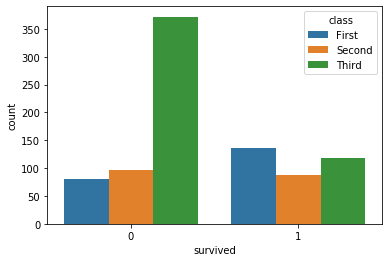

In [17]:
sns.countplot(data = titanic, x = 'survived', hue = 'class')

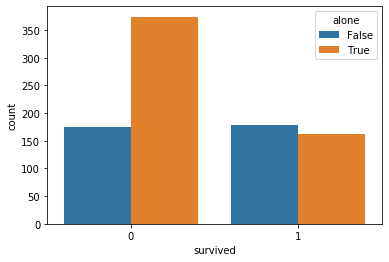

In [18]:
sns.countplot(data = titanic, x = 'survived', hue = 'alone')

This histogram shows that first class has a higher chance of survival.

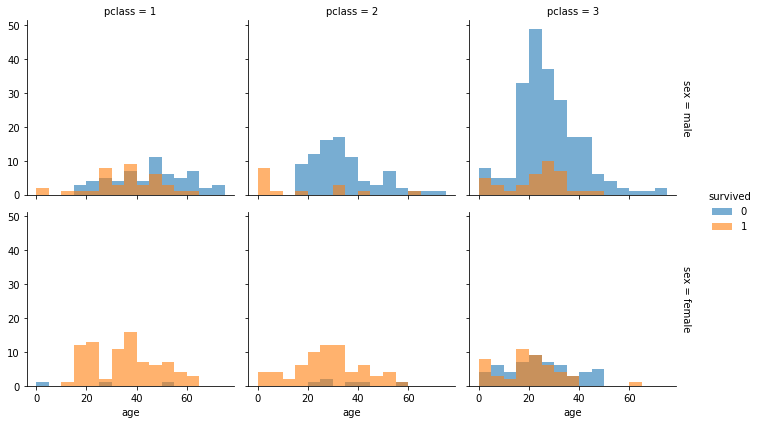

In [19]:
bins = np.arange(0, 80, 5)
g = sns.FacetGrid(titanic, row='sex', col='pclass', hue='survived', margin_titles=True, height=3, aspect=1.1)
g.map(sns.distplot, 'age', kde=False, bins=bins, hist_kws=dict(alpha=0.6))
g.add_legend()  
plt.show()  

Here we see that class increase the chance of survive. If your class is 1, you will have higher chance of survival.

Let us see the if being alone helps or not.

In [20]:
titanic['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

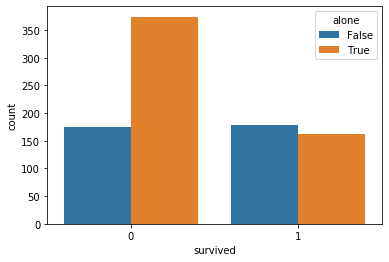

In [21]:
sns.countplot(data = titanic, x = 'survived', hue = 'alone')

This shows that being alone has less chance of surviving. Let us the catplot with sibsp(siblings and spouse) and parch(parent and children) variables.

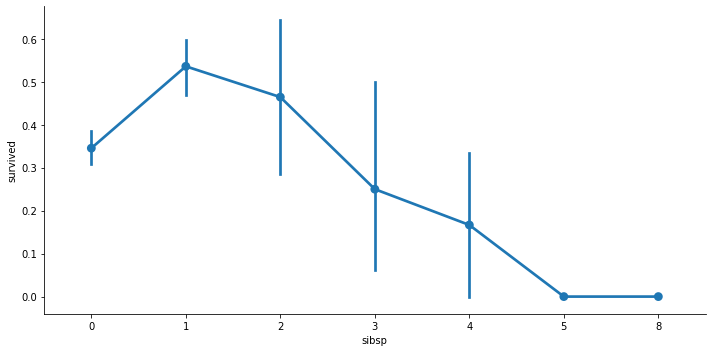

In [22]:
sns.catplot('sibsp','survived',data = titanic, aspect = 2.0, kind = 'point' )

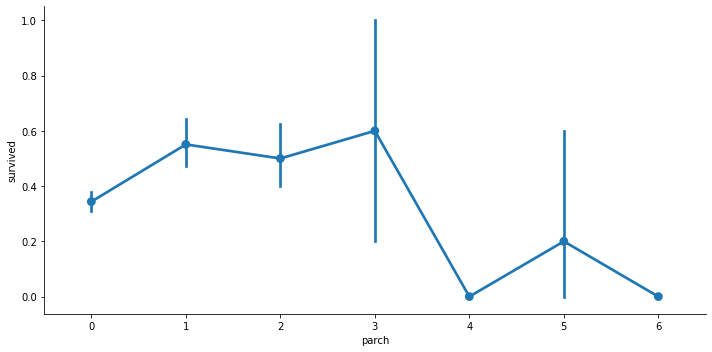

In [23]:

sns.catplot('parch','survived',data = titanic, aspect = 2.0, kind = 'point' )

## Data Prepocessing

###  Handling Missing values

In [24]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

We have three missing columns they are deck, age and embark_town. Let us deal first with deck and age then embark_town. Also note, survived and alive give same information. The same goes for embarked and embark_town. So we will drop alive and embarked town from the data set. We can also drop 'adult_male' variable because it is not givin us extra information from 'who' variable.

In [25]:
titanic = titanic.drop('deck', axis  = 1 )
titanic = titanic.drop('embarked', axis  = 1 )
titanic = titanic.drop('alive', axis  = 1 )
titanic = titanic.drop('adult_male', axis  = 1 )
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
class          891 non-null category
who            891 non-null object
embark_town    889 non-null object
alone          891 non-null bool
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 64.6+ KB


In [26]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class',
       'who', 'embark_town', 'alone'],
      dtype='object')

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
class          891 non-null category
who            891 non-null object
embark_town    889 non-null object
alone          891 non-null bool
dtypes: bool(1), category(1), float64(2), int64(4), object(3)
memory usage: 64.6+ KB


In [28]:
mean = titanic['age'].mean()
mean
age2 = titanic['age'].copy()
age2[np.isnan(age2)]=30
#age2.isnull().sum()
titanic['age'] = age2.astype(int)

 For embark_town recall it has only two missing values. So we can fill it with common values. 

In [29]:
titanic['embark_town'].describe()

count             889
unique              3
top       Southampton
freq              644
Name: embark_town, dtype: object

In [30]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
embark_town    0
alone          0
dtype: int64

In [31]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null int64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
class          891 non-null category
who            891 non-null object
embark_town    891 non-null object
alone          891 non-null bool
dtypes: bool(1), category(1), float64(1), int64(5), object(3)
memory usage: 64.6+ KB


### Converting categorical variables to numeric variables.

In [32]:
titanic.head(12)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town,alone
0,0,3,male,22,1,0,7.2500,Third,man,Southampton,False
1,1,1,female,38,1,0,71.2833,First,woman,Cherbourg,False
2,1,3,female,26,0,0,7.9250,Third,woman,Southampton,True
3,1,1,female,35,1,0,53.1000,First,woman,Southampton,False
4,0,3,male,35,0,0,8.0500,Third,man,Southampton,True
5,0,3,male,30,0,0,8.4583,Third,man,Queenstown,True
6,0,1,male,54,0,0,51.8625,First,man,Southampton,True
7,0,3,male,2,3,1,21.0750,Third,child,Southampton,False
8,1,3,female,27,0,2,11.1333,Third,woman,Southampton,False
9,1,2,female,14,1,0,30.0708,Second,child,Cherbourg,False


In [33]:
titanic_ce = titanic.copy()

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['sex','class','who','embark_town','alone'])
df_binary = encoder.fit_transform(titanic_ce)

df_binary.head()
df = df_binary
#df_binary.shape
#df_binary.info()

# Applying Machine Learning

In [34]:


X_train, X_test, Y_train, Y_test = train_test_split(
    df.loc[:, df.columns != 'survived'], 
    df['survived'], test_size = 0.2, random_state=0)
# let us divide this into train and test data
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


In [35]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(712, 18)
(179, 18)
(712,)
(179,)


## Without Scaling the Data set

## Decision Tree

In [36]:
#classifier = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#print(accuracy_score(Y_test, Y_pred))
d_tree = cm.trace()/cm.sum()
d_tree

0.9775280898876404
[[92 18]
 [25 44]]


0.7597765363128491

## Logistic Regression

In [37]:
classifier = LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced', max_iter = 10000)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
log_regr= cm.trace()/cm.sum()
log_regr

0.8019662921348315
[[89 21]
 [10 59]]


0.8268156424581006

## Random Forest

In [38]:
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                    class_weight='balanced',random_state = 0,
                                     bootstrap=True)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
rf = cm.trace()/cm.sum()
rf

#print(classifier.feature_importances_)

0.9775280898876404
[[99 11]
 [20 49]]


0.8268156424581006

## Stochastic Gradient Descent 

In [39]:
classifier = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                                        alpha=0.0001, average=True,class_weight = 'balanced')
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sgd = cm.trace()/cm.sum()
sgd

0.6671348314606742
[[81 29]
 [12 57]]


0.770949720670391

## K Nearest Neighbor

In [40]:
classifier = KNeighborsClassifier(leaf_size = 100, p=2)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
knn = cm.trace()/cm.sum()
knn

0.8216292134831461
[[90 20]
 [26 43]]


0.7430167597765364

## Gaussian Naive Bayes

In [41]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
gnb=cm.trace()/cm.sum()
gnb

0.7921348314606742
[[90 20]
 [15 54]]


0.8044692737430168

## Perceptron

In [42]:
classifier = Perceptron(random_state = 0, class_weight = 'balanced')
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
perc = cm.trace()/cm.sum()
perc

0.7092696629213483
[[73 37]
 [ 7 62]]


0.7541899441340782

## Support Vector Machine

In [43]:
classifier = SVC(max_iter = 10000, random_state = 0, gamma = 'auto')
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
svm = cm.trace()/cm.sum()
svm

0.8876404494382022
[[88 22]
 [26 43]]


0.7318435754189944

## Linear Support Vector Machine

In [44]:
classifier = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 0)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
lsvm = cm.trace()/cm.sum()
lsvm

0.8174157303370787
[[94 16]
 [16 53]]


/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8212290502793296

## Adaptive Boosting

In [45]:

classifier = AdaBoostClassifier(base_estimator = None, 
                            algorithm = 'SAMME',n_estimators=100, learning_rate=1.0)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
adaboost = cm.trace()/cm.sum()
adaboost

0.8286516853932584
[[93 17]
 [16 53]]


0.8156424581005587

## XG Boost Classifier

In [46]:
classifier = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,
                           subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                           nthread=4, scale_pos_weight=1, seed=27)
classifier.fit(X_train, Y_train)
print(classifier.score(X_train, Y_train))

#how about on a test set
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
xgboost = cm.trace()/cm.sum()
xgboost

0.9747191011235955
[[97 13]
 [18 51]]


0.8268156424581006

## Which is the best model?

In [47]:
table = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 
              'Decision Tree', 'Adaptive Boosting Classifier','XG Boost Classifier'],
    'Score': [svm,lsvm, knn, log_regr, 
              rf, gnb, perc, sgd, 
              d_tree, adaboost, xgboost]})
table_df = table.sort_values(by='Score', ascending=False)
table_df = table_df.set_index('Model')
table_df

,Score
Model,
Logistic Regression,0.826816
Random Forest,0.826816
XG Boost Classifier,0.826816
Linear Support Vector Machines,0.821229
Adaptive Boosting Classifier,0.815642
Naive Bayes,0.804469
Stochastic Gradient Decent,0.770950
Decision Tree,0.759777
Perceptron,0.754190


## Scaling

In [48]:
#This is a crucial step in rescaling input data so that all the features are mean zero with a unit variance. 
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)
#print(X_train)

## Decisiont Tree with Scaling

In [49]:
classifier2 = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#print(accuracy_score(Y_test, Y_pred))
d_tree2 = cm.trace()/cm.sum()
d_tree2

0.9775280898876404
[[92 18]
 [24 45]]


0.7653631284916201

## Logistic Regression with Scaling

In [50]:
classifier2 =LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced',max_iter = 10000)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
#print(accuracy_score(Y_test, Y_pred))
log_regr2 = cm.trace()/cm.sum()
log_regr2

0.8047752808988764
[[90 20]
 [10 59]]


0.8324022346368715

## Random Forest with Scaling

In [51]:
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
classifier2 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', 
                                    class_weight='balanced',random_state = 0,
                                     bootstrap=True)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
rf2 = cm.trace()/cm.sum()
rf2

#print(classifier2.feature_importances_)

0.9775280898876404
[[100  10]
 [ 19  50]]


0.8379888268156425

## SGD wth Scaling 

In [52]:
classifier2 = linear_model.SGDClassifier(max_iter=5, tol=None,random_state = 0, 
                                        alpha=0.0001, average=True,class_weight = 'balanced')
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sgd2 = cm.trace()/cm.sum()
sgd2

0.7963483146067416
[[89 21]
 [ 9 60]]


0.8324022346368715

## KNN with scaling

In [53]:
classifier2 = KNeighborsClassifier(leaf_size = 100, p=2)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
knn2 = cm.trace()/cm.sum()
knn2

0.8721910112359551
[[95 15]
 [18 51]]


0.8156424581005587

## Gaussian Naive Bayes with Scaling

In [54]:
classifier2 = GaussianNB()
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
gnb2=cm.trace()/cm.sum()
gnb2

0.7921348314606742
[[90 20]
 [15 54]]


0.8044692737430168

## Perceptron with Scaling

In [55]:
classifier2 =  Perceptron(random_state = 0, class_weight = 'balanced')
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
perc2=cm.trace()/cm.sum()
perc2


0.7176966292134831
[[77 33]
 [10 59]]


0.7597765363128491

## SVM with scaling

In [56]:
classifier2 =  SVC(max_iter = 10000, random_state = 0, gamma = 'auto')
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
svm2=cm.trace()/cm.sum()
svm2


0.8412921348314607
[[99 11]
 [22 47]]


0.8156424581005587

## Linear SVM with scaling

In [57]:
classifier2 = LinearSVC(max_iter = 10000, class_weight = 'balanced', random_state = 0)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
lsvm2=cm.trace()/cm.sum()
lsvm2



0.8160112359550562
[[91 19]
 [13 56]]


0.8212290502793296

## Ada Boost with scaling

In [58]:
classifier2 = AdaBoostClassifier(base_estimator = None, 
                            algorithm = 'SAMME',n_estimators=100, learning_rate=1.0)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

adaboost2 = cm.trace()/cm.sum()
adaboost2

0.8286516853932584
[[93 17]
 [16 53]]


0.8156424581005587

## XG Boost with Scaling

In [59]:
classifier2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0,
                           subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                           nthread=4, scale_pos_weight=1, seed=27)
classifier2.fit(X_train_sc, Y_train)
print(classifier2.score(X_train_sc, Y_train))

#how about on a test set
Y_pred = classifier2.predict(X_test_sc)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
xgboost2 = cm.trace()/cm.sum()
xgboost2

0.9747191011235955
[[97 13]
 [17 52]]


0.8324022346368715

## Which is the best model with scaling?

In [60]:
table2 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree', 'Adaptive Boosting Classifier','XG Boost Classifier' ],
    'Score': [svm2,lsvm2, knn2, log_regr2, 
              rf2, gnb2, perc2, 
              sgd2, d_tree2, adaboost2, xgboost2]})
table_df2 = table2.sort_values(by='Score', ascending=False)
table_df2 = table_df2.set_index('Model')
table_df2
#type(table_df2)
#table_df2.shape
#table_df.shape

,Score
Model,
Random Forest,0.837989
Logistic Regression,0.832402
Stochastic Gradient Decent,0.832402
XG Boost Classifier,0.832402
Linear Support Vector Machines,0.821229
Support Vector Machines,0.815642
KNN,0.815642
Adaptive Boosting Classifier,0.815642
Naive Bayes,0.804469


In [61]:
pd.concat([table_df, table_df2],axis =1, sort=False, keys = ['Score','Score with Scaling']) # concat dataframes

,Score,Score with Scaling
,Score,Score
Logistic Regression,0.826816,0.832402
Random Forest,0.826816,0.837989
XG Boost Classifier,0.826816,0.832402
Linear Support Vector Machines,0.821229,0.821229
Adaptive Boosting Classifier,0.815642,0.815642
Naive Bayes,0.804469,0.804469
Stochastic Gradient Decent,0.770950,0.832402
Decision Tree,0.759777,0.765363
Perceptron,0.754190,0.759777


Overall Random Forest with scaling gives slightly better result.

## ROC Curve for RF

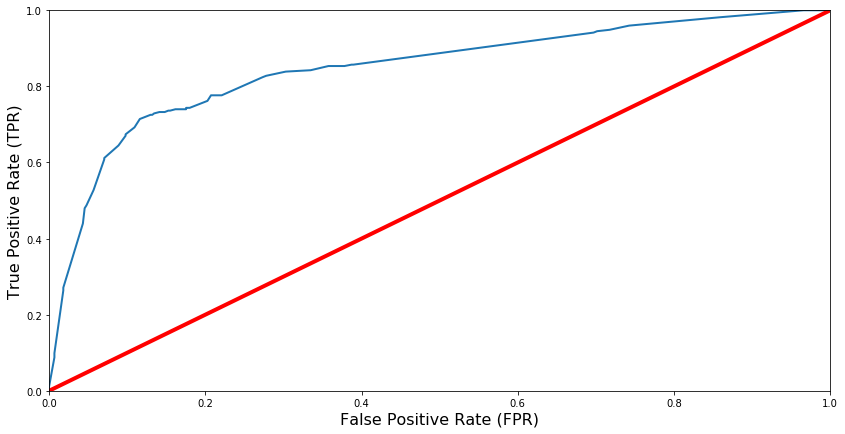

In [62]:
from sklearn.metrics import roc_curve

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
# getting the probabilities of our predictions
y_probs = rf.predict_proba(X_train_sc)
#print(y_probs)
y_probs = y_probs[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_probs)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

 ## ROC Curve for Logistic Regression

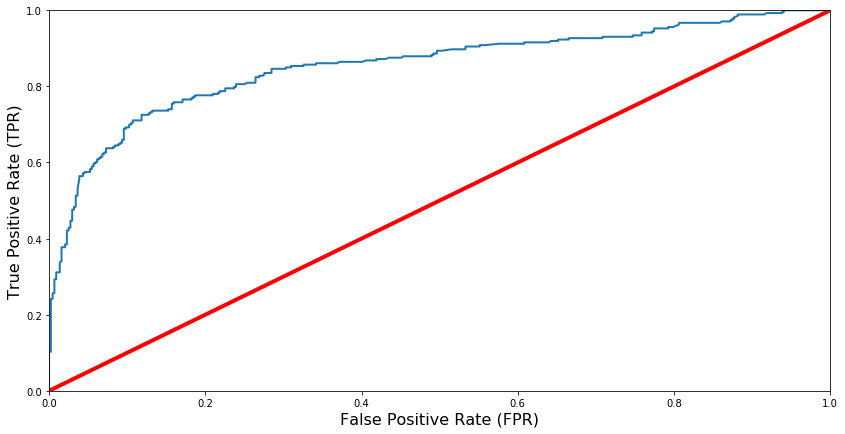

In [63]:
from sklearn.metrics import roc_curve
log_reg = LogisticRegression(C=0.65,random_state = 0, solver='lbfgs', 
                                multi_class='multinomial',class_weight='balanced', max_iter = 10000)
log_reg.fit(X_train, Y_train)
# getting the probabilities of our predictions
y_probs = log_reg.predict_proba(X_train_sc)
#print(y_probs)
y_probs = y_probs[:,1]

# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_probs)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

From now we will use scaled data set. We will now compare randomizedsearch and gridsearc. We will pick one and continue that way. We will try compare these in one of the models like SVM, RF and Logistic regression but not all of them.

## Hyperparameter tuning with RandomizedSearchCV and GridSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

In [65]:
## We willl use this function to see what parameters gives a best score
def best_score(classifier):
    
    print(classifier.best_score_)    
    print(classifier.best_params_)
    print(classifier.best_estimator_)
    
    return classifier.best_score_

### SVM with RandomizedSearchCV

In [66]:
param_grid = {'C':uniform(0.1, 5000), 'gamma':uniform(0.0001, 1) }
svm_rand = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=100)
svm_rand.fit(X_train_sc,Y_train)
score_svm_rand = best_score(svm_rand)

0.7935393258426966
{'C': 4662.129864320772, 'gamma': 0.006360675163260898}
SVC(C=4662.129864320772, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.006360675163260898,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## SVM with GridSearchCV

In [67]:
param_grid = {'C': [0.1,10, 100, 1000,5000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=10, refit=True, verbose=1)
svm_grid.fit(X_train_sc,Y_train)
score_svm_grid= best_score(svm_grid)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8356741573033708
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   26.0s finished


Let us compare both of them on a test set as well.

In [68]:
y_pred_grid = svm_grid.predict(X_test_sc)
y_pred_rand = svm_rand.predict(X_test_sc)

cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
cm_rand = confusion_matrix(Y_test, y_pred_rand)
print(cm_rand)
svm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
svm_rand_accuracy = cm_rand.trace()/cm_rand.sum()

print('Gridsearch accuracy is: ', svm_grid_accuracy)
print('Randomsearch accurasy is: ', svm_rand_accuracy)

[[99 11]
 [21 48]]
[[100  10]
 [ 23  46]]
Gridsearch accuracy is:  0.8212290502793296
Randomsearch accurasy is:  0.8156424581005587


# All the models with Grid search

## Linear SVM

In [69]:
param_grid = {'C': [0.1,10, 100, 1000,5000]}
lsvm_grid = GridSearchCV(LinearSVC(max_iter = 10000), param_grid, cv=10, refit=True, verbose=1)
lsvm_grid.fit(X_train_sc,Y_train)
score_lsvm_grid= best_score(lsvm_grid)
y_pred_grid = lsvm_grid.predict(X_test_sc)


cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
lsvm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', lsvm_grid_accuracy)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 5 candidates, totalling 50 fits


/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the num

0.8286516853932584
{'C': 0.1}
LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
[[95 15]
 [18 51]]
Gridsearch accuracy is:  0.8156424581005587


/Users/sergazy/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.0s finished


## Logistic Regression

In [70]:
param_grid = {'C': np.logspace(0, 4, 10),   'penalty' : ['l1', 'l2']}
log_reg = LogisticRegression(random_state = 0,class_weight='balanced', max_iter = 10000)

log_reg_grid = GridSearchCV(log_reg, param_grid, cv=10, refit=True, verbose=1)
log_reg_grid.fit(X_train_sc,Y_train)
score_log_reg_grid = best_score(log_reg_grid)

y_pred_grid = log_reg_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
log_reg_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', log_reg_grid_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 20 candidates, totalling 200 fits
0.8047752808988764
{'C': 2.7825594022071245, 'penalty': 'l2'}
LogisticRegression(C=2.7825594022071245, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=None,
                   penalty='l2', random_state=0, solver='warn', tol=0.0001,
                   verbose=0, warm_start=False)
[[90 20]
 [10 59]]
Gridsearch accuracy is:  0.8324022346368715


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.5s finished


## SGD 

In [71]:
param_grid = {
    'loss': ['log'],
    'penalty': ['elasticnet'],
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}
sgd = SGDClassifier(random_state=0, class_weight='balanced')

sgd_grid = GridSearchCV(sgd, param_grid=param_grid,
                                    n_jobs=-1, scoring='roc_auc')
sgd_grid.fit(X_train_sc, Y_train)

y_pred_grid = sgd_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
sgd_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', sgd_grid_accuracy)

[[89 21]
 [14 55]]
Gridsearch accuracy is:  0.8044692737430168


## Decision Tree 

In [72]:
decs_tree = DecisionTreeClassifier(random_state = 0)
#param_grid = {'min_samples_split': [4,7,10,12], criterion : ['entropy','gini']}
param_grid = {'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
decs_tree_grid = GridSearchCV(decs_tree, param_grid, cv=10, refit=True, verbose=1)
decs_tree_grid.fit(X_train_sc, Y_train)
#print(decs_tree_grid.score(X_train_sc, Y_train))
score_decs_tree_grid= best_score(decs_tree_grid)

y_pred_grid = decs_tree_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
decs_tree_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', decs_tree_grid_accuracy)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.827247191011236
{'max_depth': 3, 'min_samples_split': 110}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=110,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')
[[95 15]
 [17 52]]
Gridsearch accuracy is:  0.8212290502793296


[Parallel(n_jobs=1)]: Done 2500 out of 2500 | elapsed:    5.9s finished


## Random Forest

In [73]:
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [6,7,8,9,10],  
              'min_samples_split': [5, 6, 7, 8]}


rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, refit=True, verbose=1)
rf_grid.fit(X_train_sc,Y_train)
score_rf_grid = best_score(rf_grid)

y_pred_grid = rf_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
rf_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', rf_grid_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
0.8370786516853933
{'max_depth': 5, 'max_features': 7, 'min_samples_split': 8}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[99 11]
 [21 48]]
Gridsearch accuracy is:  0.8212290502793296


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   13.5s finished


## KNN

In [74]:
knn = KNeighborsClassifier()
param_grid = {'leaf_size':list(range(3,15,1)), 'n_neighbors':list(range(1, 15, 1)), 
              'weights':['uniform', 'distance']}


knn_grid = GridSearchCV(knn, param_grid, cv=10, verbose=1, scoring='accuracy')
knn_grid.fit(X_train_sc, Y_train)

score_knn_grid = best_score(knn_grid)


y_pred_grid = knn_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
knn_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', knn_grid_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 336 candidates, totalling 3360 fits
0.8188202247191011
{'leaf_size': 3, 'n_neighbors': 6, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
[[98 12]
 [23 46]]
Gridsearch accuracy is:  0.8044692737430168


[Parallel(n_jobs=1)]: Done 3360 out of 3360 | elapsed:   16.5s finished


## Ada Boost

In [75]:
param_grid = {'n_estimators': [30, 50, 100], 'learning_rate': [0.08, 0.1, 0.2]}
ada_grid = GridSearchCV(AdaBoostClassifier(), param_grid, cv=10, refit=True, verbose=1)
ada_grid.fit(X_train_sc,Y_train)
score_ada_grid = best_score(ada_grid)

y_pred_grid = knn_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
ada_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', ada_grid_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.824438202247191
{'learning_rate': 0.2, 'n_estimators': 50}
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.2,
                   n_estimators=50, random_state=None)
[[98 12]
 [23 46]]
Gridsearch accuracy is:  0.8044692737430168


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    7.6s finished


## XGB Classifier

In [76]:
xgb = XGBClassifier(learning_rate =0.1,min_child_weight=1, gamma=0,
                           subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic',
                           nthread=4, scale_pos_weight=1, seed=27)
#gbc = GradientBoostingClassifier()
param_grid = {'n_estimators': [50, 100,500,1000], 
              'min_samples_split': [3, 4, 5, 6, 7],
              'max_depth': [3, 4, 5, 6]}

xgb_grid = GridSearchCV(xgb, param_grid, cv=10, refit=True, verbose=1)
xgb_grid.fit(X_train_sc, Y_train)
score_xgb_grid = best_score(knn_grid)

y_pred_grid = xgb_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
xgb_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', xgb_grid_accuracy)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 80 candidates, totalling 800 fits
0.8188202247191011
{'leaf_size': 3, 'n_neighbors': 6, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=3, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
[[103   7]
 [ 19  50]]
Gridsearch accuracy is:  0.8547486033519553


[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  4.2min finished


## Cat Boost

In [81]:
from catboost import CatBoostClassifier

param_grid = {'iterations': [100, 150], 'learning_rate': [0.3, 0.4, 0.5], 'loss_function' : ['Logloss']}

cat_grid = GridSearchCV(CatBoostClassifier(), param_grid, cv=10, refit=True, verbose=1)
cat_grid.fit(X_train_sc, Y_train)
#score_cat_grid = best_score(cat_grid)

y_pred_grid = cat_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
cat_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', cat_grid_accuracy)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
0:	learn: 0.5972080	total: 2.57ms	remaining: 254ms
1:	learn: 0.5351378	total: 5.09ms	remaining: 250ms
2:	learn: 0.4959796	total: 7.61ms	remaining: 246ms
3:	learn: 0.4664559	total: 9.95ms	remaining: 239ms
4:	learn: 0.4456187	total: 13ms	remaining: 248ms
5:	learn: 0.4315975	total: 15.7ms	remaining: 247ms
6:	learn: 0.4209431	total: 17.9ms	remaining: 238ms
7:	learn: 0.4150413	total: 20.2ms	remaining: 233ms
8:	learn: 0.4096782	total: 24.5ms	remaining: 248ms
9:	learn: 0.4070617	total: 27.3ms	remaining: 246ms
10:	learn: 0.4036231	total: 29.6ms	remaining: 239ms
11:	learn: 0.4007253	total: 31.6ms	remaining: 232ms
12:	learn: 0.3994903	total: 33.8ms	remaining: 226ms
13:	learn: 0.3969242	total: 36.1ms	remaining: 222ms
14:	learn: 0.3939278	total: 38.4ms	remaining: 218ms
15:	learn: 0.3910977	total: 40.5ms	remaining: 213ms
16:	learn: 0.3880247	total: 42.9ms	remaining: 209ms
17:	learn: 0.3836671	total: 45.2ms	remaining: 206ms
18:	learn: 0.38

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


68:	learn: 0.2798477	total: 161ms	remaining: 72.4ms
69:	learn: 0.2785785	total: 167ms	remaining: 71.6ms
70:	learn: 0.2776110	total: 171ms	remaining: 69.9ms
71:	learn: 0.2763952	total: 178ms	remaining: 69.1ms
72:	learn: 0.2759006	total: 182ms	remaining: 67.5ms
73:	learn: 0.2745444	total: 185ms	remaining: 65.1ms
74:	learn: 0.2728932	total: 188ms	remaining: 62.5ms
75:	learn: 0.2716028	total: 190ms	remaining: 60ms
76:	learn: 0.2709205	total: 196ms	remaining: 58.5ms
77:	learn: 0.2696908	total: 199ms	remaining: 56.1ms
78:	learn: 0.2683984	total: 201ms	remaining: 53.4ms
79:	learn: 0.2675433	total: 203ms	remaining: 50.7ms
80:	learn: 0.2659212	total: 205ms	remaining: 48.1ms
81:	learn: 0.2648800	total: 207ms	remaining: 45.5ms
82:	learn: 0.2642817	total: 209ms	remaining: 42.9ms
83:	learn: 0.2638038	total: 211ms	remaining: 40.3ms
84:	learn: 0.2624773	total: 214ms	remaining: 37.7ms
85:	learn: 0.2621031	total: 216ms	remaining: 35.1ms
86:	learn: 0.2614414	total: 218ms	remaining: 32.5ms
87:	learn: 0.2

37:	learn: 0.3366607	total: 91.2ms	remaining: 149ms
38:	learn: 0.3349303	total: 95.9ms	remaining: 150ms
39:	learn: 0.3330912	total: 99.7ms	remaining: 150ms
40:	learn: 0.3314175	total: 105ms	remaining: 151ms
41:	learn: 0.3297298	total: 113ms	remaining: 157ms
42:	learn: 0.3289486	total: 116ms	remaining: 154ms
43:	learn: 0.3266989	total: 122ms	remaining: 155ms
44:	learn: 0.3251090	total: 124ms	remaining: 152ms
45:	learn: 0.3238745	total: 126ms	remaining: 148ms
46:	learn: 0.3223677	total: 129ms	remaining: 146ms
47:	learn: 0.3187414	total: 131ms	remaining: 142ms
48:	learn: 0.3178550	total: 133ms	remaining: 138ms
49:	learn: 0.3159811	total: 135ms	remaining: 135ms
50:	learn: 0.3130509	total: 137ms	remaining: 132ms
51:	learn: 0.3124410	total: 139ms	remaining: 129ms
52:	learn: 0.3098867	total: 142ms	remaining: 126ms
53:	learn: 0.3069020	total: 144ms	remaining: 122ms
54:	learn: 0.3057676	total: 146ms	remaining: 119ms
55:	learn: 0.3048939	total: 148ms	remaining: 116ms
56:	learn: 0.3027782	total: 

17:	learn: 0.3876972	total: 36.6ms	remaining: 167ms
18:	learn: 0.3867842	total: 39ms	remaining: 166ms
19:	learn: 0.3850231	total: 52.6ms	remaining: 210ms
20:	learn: 0.3823546	total: 55.1ms	remaining: 207ms
21:	learn: 0.3788451	total: 57.4ms	remaining: 204ms
22:	learn: 0.3760260	total: 59.3ms	remaining: 199ms
23:	learn: 0.3716331	total: 61.3ms	remaining: 194ms
24:	learn: 0.3693006	total: 63ms	remaining: 189ms
25:	learn: 0.3664496	total: 64.8ms	remaining: 184ms
26:	learn: 0.3637640	total: 68.4ms	remaining: 185ms
27:	learn: 0.3623556	total: 70.2ms	remaining: 181ms
28:	learn: 0.3611134	total: 72ms	remaining: 176ms
29:	learn: 0.3572078	total: 74.5ms	remaining: 174ms
30:	learn: 0.3543130	total: 76.6ms	remaining: 171ms
31:	learn: 0.3490559	total: 78.5ms	remaining: 167ms
32:	learn: 0.3475401	total: 80.4ms	remaining: 163ms
33:	learn: 0.3433702	total: 82.3ms	remaining: 160ms
34:	learn: 0.3407303	total: 84.2ms	remaining: 156ms
35:	learn: 0.3393796	total: 86.5ms	remaining: 154ms
36:	learn: 0.33749

13:	learn: 0.3873336	total: 41.9ms	remaining: 257ms
14:	learn: 0.3830025	total: 44.1ms	remaining: 250ms
15:	learn: 0.3798864	total: 46ms	remaining: 242ms
16:	learn: 0.3789065	total: 47.5ms	remaining: 232ms
17:	learn: 0.3753481	total: 49.6ms	remaining: 226ms
18:	learn: 0.3728237	total: 51.4ms	remaining: 219ms
19:	learn: 0.3696765	total: 53.6ms	remaining: 214ms
20:	learn: 0.3669134	total: 56.3ms	remaining: 212ms
21:	learn: 0.3659869	total: 58ms	remaining: 206ms
22:	learn: 0.3648978	total: 60.2ms	remaining: 201ms
23:	learn: 0.3630708	total: 62.3ms	remaining: 197ms
24:	learn: 0.3607449	total: 64.3ms	remaining: 193ms
25:	learn: 0.3584118	total: 66.6ms	remaining: 190ms
26:	learn: 0.3572013	total: 68.7ms	remaining: 186ms
27:	learn: 0.3535139	total: 70.6ms	remaining: 182ms
28:	learn: 0.3501962	total: 73.4ms	remaining: 180ms
29:	learn: 0.3484483	total: 76ms	remaining: 177ms
30:	learn: 0.3453547	total: 78.5ms	remaining: 175ms
31:	learn: 0.3426291	total: 81.6ms	remaining: 173ms
32:	learn: 0.34083

35:	learn: 0.3451419	total: 74.4ms	remaining: 132ms
36:	learn: 0.3438428	total: 79.6ms	remaining: 136ms
37:	learn: 0.3415330	total: 82.2ms	remaining: 134ms
38:	learn: 0.3381465	total: 84.2ms	remaining: 132ms
39:	learn: 0.3355985	total: 88.1ms	remaining: 132ms
40:	learn: 0.3341472	total: 91ms	remaining: 131ms
41:	learn: 0.3323739	total: 94.5ms	remaining: 131ms
42:	learn: 0.3295174	total: 97ms	remaining: 129ms
43:	learn: 0.3282623	total: 99.6ms	remaining: 127ms
44:	learn: 0.3268964	total: 102ms	remaining: 125ms
45:	learn: 0.3255218	total: 104ms	remaining: 123ms
46:	learn: 0.3241028	total: 107ms	remaining: 120ms
47:	learn: 0.3211210	total: 109ms	remaining: 118ms
48:	learn: 0.3192663	total: 111ms	remaining: 115ms
49:	learn: 0.3174552	total: 114ms	remaining: 114ms
50:	learn: 0.3156644	total: 115ms	remaining: 111ms
51:	learn: 0.3121302	total: 117ms	remaining: 108ms
52:	learn: 0.3105084	total: 119ms	remaining: 106ms
53:	learn: 0.3084762	total: 121ms	remaining: 103ms
54:	learn: 0.3069790	total

37:	learn: 0.3009245	total: 85.6ms	remaining: 140ms
38:	learn: 0.2972848	total: 91.1ms	remaining: 142ms
39:	learn: 0.2953724	total: 95.1ms	remaining: 143ms
40:	learn: 0.2930855	total: 102ms	remaining: 146ms
41:	learn: 0.2920042	total: 104ms	remaining: 144ms
42:	learn: 0.2906398	total: 107ms	remaining: 142ms
43:	learn: 0.2898475	total: 110ms	remaining: 140ms
44:	learn: 0.2877557	total: 113ms	remaining: 138ms
45:	learn: 0.2849306	total: 115ms	remaining: 135ms
46:	learn: 0.2831036	total: 117ms	remaining: 132ms
47:	learn: 0.2814499	total: 119ms	remaining: 129ms
48:	learn: 0.2799946	total: 121ms	remaining: 126ms
49:	learn: 0.2780897	total: 123ms	remaining: 123ms
50:	learn: 0.2766594	total: 125ms	remaining: 120ms
51:	learn: 0.2756269	total: 127ms	remaining: 117ms
52:	learn: 0.2739440	total: 129ms	remaining: 115ms
53:	learn: 0.2724321	total: 132ms	remaining: 112ms
54:	learn: 0.2713707	total: 134ms	remaining: 110ms
55:	learn: 0.2705418	total: 136ms	remaining: 107ms
56:	learn: 0.2689148	total: 

47:	learn: 0.2843596	total: 107ms	remaining: 116ms
48:	learn: 0.2826865	total: 111ms	remaining: 115ms
49:	learn: 0.2809147	total: 114ms	remaining: 114ms
50:	learn: 0.2786783	total: 123ms	remaining: 118ms
51:	learn: 0.2770052	total: 126ms	remaining: 116ms
52:	learn: 0.2762113	total: 128ms	remaining: 114ms
53:	learn: 0.2748695	total: 130ms	remaining: 111ms
54:	learn: 0.2723598	total: 132ms	remaining: 108ms
55:	learn: 0.2712671	total: 134ms	remaining: 105ms
56:	learn: 0.2694476	total: 136ms	remaining: 103ms
57:	learn: 0.2671649	total: 138ms	remaining: 100ms
58:	learn: 0.2657850	total: 140ms	remaining: 97.4ms
59:	learn: 0.2650903	total: 142ms	remaining: 94.7ms
60:	learn: 0.2627532	total: 144ms	remaining: 92ms
61:	learn: 0.2617357	total: 146ms	remaining: 89.4ms
62:	learn: 0.2595698	total: 148ms	remaining: 86.8ms
63:	learn: 0.2580419	total: 150ms	remaining: 84.4ms
64:	learn: 0.2574194	total: 152ms	remaining: 81.9ms
65:	learn: 0.2565934	total: 157ms	remaining: 80.7ms
66:	learn: 0.2558578	tota

89:	learn: 0.2316409	total: 178ms	remaining: 19.8ms
90:	learn: 0.2310043	total: 183ms	remaining: 18.1ms
91:	learn: 0.2296286	total: 185ms	remaining: 16.1ms
92:	learn: 0.2285194	total: 188ms	remaining: 14.1ms
93:	learn: 0.2280168	total: 190ms	remaining: 12.1ms
94:	learn: 0.2271297	total: 192ms	remaining: 10.1ms
95:	learn: 0.2266933	total: 198ms	remaining: 8.26ms
96:	learn: 0.2261647	total: 201ms	remaining: 6.21ms
97:	learn: 0.2253478	total: 203ms	remaining: 4.15ms
98:	learn: 0.2245570	total: 205ms	remaining: 2.07ms
99:	learn: 0.2229481	total: 207ms	remaining: 0us
0:	learn: 0.5597769	total: 1.35ms	remaining: 134ms
1:	learn: 0.5124485	total: 2.46ms	remaining: 120ms
2:	learn: 0.4750640	total: 4.55ms	remaining: 147ms
3:	learn: 0.4479453	total: 6.52ms	remaining: 156ms
4:	learn: 0.4324262	total: 8.76ms	remaining: 166ms
5:	learn: 0.4224759	total: 10.7ms	remaining: 167ms
6:	learn: 0.4113417	total: 12.7ms	remaining: 168ms
7:	learn: 0.4060219	total: 14.5ms	remaining: 167ms
8:	learn: 0.4012683	tot

21:	learn: 0.3603583	total: 43.8ms	remaining: 155ms
22:	learn: 0.3592765	total: 48.2ms	remaining: 161ms
23:	learn: 0.3571611	total: 51.7ms	remaining: 164ms
24:	learn: 0.3552191	total: 55.1ms	remaining: 165ms
25:	learn: 0.3539638	total: 58.3ms	remaining: 166ms
26:	learn: 0.3461572	total: 60.9ms	remaining: 165ms
27:	learn: 0.3435810	total: 63.8ms	remaining: 164ms
28:	learn: 0.3422162	total: 65.7ms	remaining: 161ms
29:	learn: 0.3406378	total: 67.6ms	remaining: 158ms
30:	learn: 0.3381685	total: 69.6ms	remaining: 155ms
31:	learn: 0.3350823	total: 71.7ms	remaining: 152ms
32:	learn: 0.3306825	total: 73.4ms	remaining: 149ms
33:	learn: 0.3256266	total: 75.4ms	remaining: 146ms
34:	learn: 0.3231898	total: 77.5ms	remaining: 144ms
35:	learn: 0.3199152	total: 79.5ms	remaining: 141ms
36:	learn: 0.3171704	total: 81.3ms	remaining: 139ms
37:	learn: 0.3154675	total: 83.5ms	remaining: 136ms
38:	learn: 0.3123154	total: 85.5ms	remaining: 134ms
39:	learn: 0.3076508	total: 87.5ms	remaining: 131ms
40:	learn: 0

83:	learn: 0.2450918	total: 185ms	remaining: 35.2ms
84:	learn: 0.2439850	total: 190ms	remaining: 33.5ms
85:	learn: 0.2423990	total: 194ms	remaining: 31.5ms
86:	learn: 0.2418711	total: 198ms	remaining: 29.5ms
87:	learn: 0.2403743	total: 200ms	remaining: 27.3ms
88:	learn: 0.2393416	total: 202ms	remaining: 25ms
89:	learn: 0.2385194	total: 204ms	remaining: 22.7ms
90:	learn: 0.2374584	total: 206ms	remaining: 20.4ms
91:	learn: 0.2360117	total: 209ms	remaining: 18.1ms
92:	learn: 0.2352673	total: 211ms	remaining: 15.9ms
93:	learn: 0.2340665	total: 213ms	remaining: 13.6ms
94:	learn: 0.2329387	total: 216ms	remaining: 11.4ms
95:	learn: 0.2317273	total: 218ms	remaining: 9.09ms
96:	learn: 0.2301722	total: 220ms	remaining: 6.81ms
97:	learn: 0.2287094	total: 223ms	remaining: 4.54ms
98:	learn: 0.2275464	total: 224ms	remaining: 2.27ms
99:	learn: 0.2261452	total: 227ms	remaining: 0us
0:	learn: 0.5641348	total: 1.99ms	remaining: 197ms
1:	learn: 0.4999101	total: 4.16ms	remaining: 204ms
2:	learn: 0.4662966

14:	learn: 0.3566339	total: 32.6ms	remaining: 185ms
15:	learn: 0.3540737	total: 37.1ms	remaining: 195ms
16:	learn: 0.3524357	total: 39.1ms	remaining: 191ms
17:	learn: 0.3477344	total: 41.2ms	remaining: 188ms
18:	learn: 0.3443261	total: 45.7ms	remaining: 195ms
19:	learn: 0.3409483	total: 48.8ms	remaining: 195ms
20:	learn: 0.3377262	total: 51.9ms	remaining: 195ms
21:	learn: 0.3336833	total: 54.1ms	remaining: 192ms
22:	learn: 0.3316163	total: 56.4ms	remaining: 189ms
23:	learn: 0.3287014	total: 58.4ms	remaining: 185ms
24:	learn: 0.3236907	total: 60.3ms	remaining: 181ms
25:	learn: 0.3202563	total: 62.3ms	remaining: 177ms
26:	learn: 0.3171250	total: 64.5ms	remaining: 174ms
27:	learn: 0.3137091	total: 66.4ms	remaining: 171ms
28:	learn: 0.3123864	total: 68.6ms	remaining: 168ms
29:	learn: 0.3085114	total: 70.8ms	remaining: 165ms
30:	learn: 0.3056653	total: 72.8ms	remaining: 162ms
31:	learn: 0.3033272	total: 74.9ms	remaining: 159ms
32:	learn: 0.2993687	total: 76.9ms	remaining: 156ms
33:	learn: 0

74:	learn: 0.2302133	total: 160ms	remaining: 53.4ms
75:	learn: 0.2289238	total: 166ms	remaining: 52.4ms
76:	learn: 0.2269152	total: 170ms	remaining: 50.8ms
77:	learn: 0.2259262	total: 174ms	remaining: 49ms
78:	learn: 0.2243643	total: 176ms	remaining: 46.7ms
79:	learn: 0.2233075	total: 178ms	remaining: 44.5ms
80:	learn: 0.2213491	total: 180ms	remaining: 42.2ms
81:	learn: 0.2206361	total: 182ms	remaining: 39.9ms
82:	learn: 0.2194085	total: 184ms	remaining: 37.7ms
83:	learn: 0.2189114	total: 186ms	remaining: 35.4ms
84:	learn: 0.2178196	total: 189ms	remaining: 33.3ms
85:	learn: 0.2168075	total: 191ms	remaining: 31.1ms
86:	learn: 0.2157171	total: 193ms	remaining: 28.9ms
87:	learn: 0.2142307	total: 195ms	remaining: 26.6ms
88:	learn: 0.2134327	total: 197ms	remaining: 24.4ms
89:	learn: 0.2125554	total: 199ms	remaining: 22.1ms
90:	learn: 0.2115200	total: 201ms	remaining: 19.9ms
91:	learn: 0.2106146	total: 203ms	remaining: 17.7ms
92:	learn: 0.2095713	total: 205ms	remaining: 15.5ms
93:	learn: 0.2

9:	learn: 0.3902348	total: 22ms	remaining: 198ms
10:	learn: 0.3823688	total: 26.3ms	remaining: 213ms
11:	learn: 0.3801510	total: 29.2ms	remaining: 214ms
12:	learn: 0.3733567	total: 33.9ms	remaining: 227ms
13:	learn: 0.3702225	total: 36.3ms	remaining: 223ms
14:	learn: 0.3662648	total: 38.9ms	remaining: 220ms
15:	learn: 0.3627101	total: 40.7ms	remaining: 214ms
16:	learn: 0.3585438	total: 42.6ms	remaining: 208ms
17:	learn: 0.3551717	total: 44.5ms	remaining: 203ms
18:	learn: 0.3511348	total: 46.5ms	remaining: 198ms
19:	learn: 0.3459172	total: 48.7ms	remaining: 195ms
20:	learn: 0.3415960	total: 50.6ms	remaining: 191ms
21:	learn: 0.3372938	total: 52.6ms	remaining: 186ms
22:	learn: 0.3351440	total: 54.7ms	remaining: 183ms
23:	learn: 0.3310531	total: 56.5ms	remaining: 179ms
24:	learn: 0.3284160	total: 58.5ms	remaining: 176ms
25:	learn: 0.3272798	total: 60.6ms	remaining: 173ms
26:	learn: 0.3233114	total: 62.6ms	remaining: 169ms
27:	learn: 0.3213936	total: 64.6ms	remaining: 166ms
28:	learn: 0.31

76:	learn: 0.2190612	total: 157ms	remaining: 47ms
77:	learn: 0.2182850	total: 162ms	remaining: 45.6ms
78:	learn: 0.2172688	total: 165ms	remaining: 43.9ms
79:	learn: 0.2153317	total: 167ms	remaining: 41.8ms
80:	learn: 0.2142338	total: 169ms	remaining: 39.7ms
81:	learn: 0.2133754	total: 171ms	remaining: 37.5ms
82:	learn: 0.2124729	total: 178ms	remaining: 36.5ms
83:	learn: 0.2119367	total: 181ms	remaining: 34.4ms
84:	learn: 0.2109700	total: 183ms	remaining: 32.3ms
85:	learn: 0.2091953	total: 185ms	remaining: 30.2ms
86:	learn: 0.2079957	total: 187ms	remaining: 28ms
87:	learn: 0.2069234	total: 189ms	remaining: 25.8ms
88:	learn: 0.2063375	total: 191ms	remaining: 23.7ms
89:	learn: 0.2053309	total: 193ms	remaining: 21.5ms
90:	learn: 0.2047551	total: 195ms	remaining: 19.3ms
91:	learn: 0.2037265	total: 197ms	remaining: 17.1ms
92:	learn: 0.2024169	total: 198ms	remaining: 14.9ms
93:	learn: 0.2018873	total: 201ms	remaining: 12.8ms
94:	learn: 0.2005469	total: 203ms	remaining: 10.7ms
95:	learn: 0.199

96:	learn: 0.2140579	total: 237ms	remaining: 7.34ms
97:	learn: 0.2133201	total: 242ms	remaining: 4.94ms
98:	learn: 0.2125846	total: 246ms	remaining: 2.49ms
99:	learn: 0.2117894	total: 250ms	remaining: 0us
0:	learn: 0.5393162	total: 1.86ms	remaining: 184ms
1:	learn: 0.4751275	total: 5.05ms	remaining: 248ms
2:	learn: 0.4447544	total: 7.13ms	remaining: 230ms
3:	learn: 0.4225737	total: 9.4ms	remaining: 226ms
4:	learn: 0.4101804	total: 11.5ms	remaining: 218ms
5:	learn: 0.4050642	total: 13.8ms	remaining: 216ms
6:	learn: 0.4004849	total: 16ms	remaining: 213ms
7:	learn: 0.3906158	total: 18ms	remaining: 207ms
8:	learn: 0.3886043	total: 19.2ms	remaining: 194ms
9:	learn: 0.3804526	total: 21.3ms	remaining: 191ms
10:	learn: 0.3766358	total: 23.5ms	remaining: 190ms
11:	learn: 0.3733674	total: 25.4ms	remaining: 186ms
12:	learn: 0.3695904	total: 27.6ms	remaining: 185ms
13:	learn: 0.3671628	total: 29.9ms	remaining: 184ms
14:	learn: 0.3622845	total: 32ms	remaining: 181ms
15:	learn: 0.3586178	total: 34ms

95:	learn: 0.2536678	total: 263ms	remaining: 148ms
96:	learn: 0.2529743	total: 278ms	remaining: 152ms
97:	learn: 0.2525118	total: 287ms	remaining: 152ms
98:	learn: 0.2512348	total: 290ms	remaining: 149ms
99:	learn: 0.2498420	total: 293ms	remaining: 146ms
100:	learn: 0.2479289	total: 295ms	remaining: 143ms
101:	learn: 0.2465426	total: 297ms	remaining: 140ms
102:	learn: 0.2459594	total: 299ms	remaining: 136ms
103:	learn: 0.2452208	total: 302ms	remaining: 133ms
104:	learn: 0.2424743	total: 305ms	remaining: 131ms
105:	learn: 0.2415796	total: 308ms	remaining: 128ms
106:	learn: 0.2406782	total: 310ms	remaining: 125ms
107:	learn: 0.2398979	total: 312ms	remaining: 121ms
108:	learn: 0.2388795	total: 318ms	remaining: 120ms
109:	learn: 0.2380449	total: 321ms	remaining: 117ms
110:	learn: 0.2369035	total: 323ms	remaining: 114ms
111:	learn: 0.2366358	total: 326ms	remaining: 110ms
112:	learn: 0.2357157	total: 328ms	remaining: 107ms
113:	learn: 0.2346117	total: 331ms	remaining: 104ms
114:	learn: 0.233

11:	learn: 0.4087061	total: 25.2ms	remaining: 290ms
12:	learn: 0.4055706	total: 32.2ms	remaining: 339ms
13:	learn: 0.4035703	total: 38.2ms	remaining: 371ms
14:	learn: 0.3974206	total: 41.9ms	remaining: 377ms
15:	learn: 0.3949332	total: 44.2ms	remaining: 370ms
16:	learn: 0.3891646	total: 47.2ms	remaining: 369ms
17:	learn: 0.3839368	total: 50.6ms	remaining: 371ms
18:	learn: 0.3807979	total: 52.8ms	remaining: 364ms
19:	learn: 0.3796524	total: 55ms	remaining: 357ms
20:	learn: 0.3776100	total: 58ms	remaining: 356ms
21:	learn: 0.3753524	total: 61.3ms	remaining: 357ms
22:	learn: 0.3734710	total: 63.8ms	remaining: 352ms
23:	learn: 0.3709365	total: 66.9ms	remaining: 351ms
24:	learn: 0.3673837	total: 69.3ms	remaining: 347ms
25:	learn: 0.3643670	total: 71.4ms	remaining: 340ms
26:	learn: 0.3605541	total: 73.6ms	remaining: 335ms
27:	learn: 0.3581832	total: 76.4ms	remaining: 333ms
28:	learn: 0.3569441	total: 79.3ms	remaining: 331ms
29:	learn: 0.3534142	total: 81.7ms	remaining: 327ms
30:	learn: 0.352

81:	learn: 0.2734970	total: 188ms	remaining: 156ms
82:	learn: 0.2725493	total: 194ms	remaining: 156ms
83:	learn: 0.2718527	total: 197ms	remaining: 155ms
84:	learn: 0.2702687	total: 199ms	remaining: 152ms
85:	learn: 0.2687704	total: 201ms	remaining: 150ms
86:	learn: 0.2676651	total: 205ms	remaining: 148ms
87:	learn: 0.2663912	total: 208ms	remaining: 147ms
88:	learn: 0.2645661	total: 212ms	remaining: 145ms
89:	learn: 0.2631587	total: 214ms	remaining: 143ms
90:	learn: 0.2628325	total: 216ms	remaining: 140ms
91:	learn: 0.2613886	total: 218ms	remaining: 138ms
92:	learn: 0.2605381	total: 221ms	remaining: 135ms
93:	learn: 0.2598799	total: 223ms	remaining: 133ms
94:	learn: 0.2589306	total: 225ms	remaining: 130ms
95:	learn: 0.2580014	total: 227ms	remaining: 127ms
96:	learn: 0.2571600	total: 229ms	remaining: 125ms
97:	learn: 0.2562436	total: 230ms	remaining: 122ms
98:	learn: 0.2558830	total: 233ms	remaining: 120ms
99:	learn: 0.2553525	total: 235ms	remaining: 117ms
100:	learn: 0.2537124	total: 23

141:	learn: 0.2113148	total: 822ms	remaining: 46.3ms
142:	learn: 0.2108067	total: 826ms	remaining: 40.4ms
143:	learn: 0.2099543	total: 830ms	remaining: 34.6ms
144:	learn: 0.2090827	total: 832ms	remaining: 28.7ms
145:	learn: 0.2084946	total: 835ms	remaining: 22.9ms
146:	learn: 0.2081940	total: 842ms	remaining: 17.2ms
147:	learn: 0.2075713	total: 849ms	remaining: 11.5ms
148:	learn: 0.2065855	total: 855ms	remaining: 5.74ms
149:	learn: 0.2062466	total: 858ms	remaining: 0us
0:	learn: 0.5878205	total: 11.8ms	remaining: 1.76s
1:	learn: 0.5411921	total: 18.6ms	remaining: 1.38s
2:	learn: 0.5028978	total: 20.8ms	remaining: 1.02s
3:	learn: 0.4727574	total: 24ms	remaining: 876ms
4:	learn: 0.4538104	total: 26.2ms	remaining: 761ms
5:	learn: 0.4384723	total: 28.2ms	remaining: 676ms
6:	learn: 0.4257169	total: 30ms	remaining: 612ms
7:	learn: 0.4175933	total: 31.7ms	remaining: 563ms
8:	learn: 0.4124251	total: 33.6ms	remaining: 527ms
9:	learn: 0.4089658	total: 35.8ms	remaining: 501ms
10:	learn: 0.4047052

53:	learn: 0.3003972	total: 115ms	remaining: 205ms
54:	learn: 0.2983457	total: 119ms	remaining: 205ms
55:	learn: 0.2975628	total: 121ms	remaining: 203ms
56:	learn: 0.2952667	total: 127ms	remaining: 208ms
57:	learn: 0.2944675	total: 132ms	remaining: 209ms
58:	learn: 0.2923860	total: 134ms	remaining: 206ms
59:	learn: 0.2914396	total: 136ms	remaining: 204ms
60:	learn: 0.2905489	total: 138ms	remaining: 201ms
61:	learn: 0.2895453	total: 140ms	remaining: 198ms
62:	learn: 0.2878418	total: 142ms	remaining: 196ms
63:	learn: 0.2855788	total: 144ms	remaining: 193ms
64:	learn: 0.2842473	total: 146ms	remaining: 190ms
65:	learn: 0.2831677	total: 148ms	remaining: 188ms
66:	learn: 0.2810978	total: 150ms	remaining: 185ms
67:	learn: 0.2801351	total: 152ms	remaining: 183ms
68:	learn: 0.2785049	total: 154ms	remaining: 180ms
69:	learn: 0.2761576	total: 156ms	remaining: 178ms
70:	learn: 0.2752207	total: 158ms	remaining: 175ms
71:	learn: 0.2739222	total: 160ms	remaining: 173ms
72:	learn: 0.2729748	total: 162

67:	learn: 0.2839721	total: 139ms	remaining: 167ms
68:	learn: 0.2827285	total: 143ms	remaining: 168ms
69:	learn: 0.2817418	total: 147ms	remaining: 167ms
70:	learn: 0.2808363	total: 149ms	remaining: 166ms
71:	learn: 0.2797873	total: 151ms	remaining: 164ms
72:	learn: 0.2781903	total: 153ms	remaining: 162ms
73:	learn: 0.2761902	total: 155ms	remaining: 159ms
74:	learn: 0.2739740	total: 157ms	remaining: 157ms
75:	learn: 0.2721026	total: 159ms	remaining: 155ms
76:	learn: 0.2713580	total: 162ms	remaining: 154ms
77:	learn: 0.2693542	total: 164ms	remaining: 152ms
78:	learn: 0.2672762	total: 167ms	remaining: 150ms
79:	learn: 0.2663038	total: 169ms	remaining: 148ms
80:	learn: 0.2659038	total: 171ms	remaining: 146ms
81:	learn: 0.2652092	total: 173ms	remaining: 144ms
82:	learn: 0.2638291	total: 175ms	remaining: 141ms
83:	learn: 0.2630883	total: 177ms	remaining: 139ms
84:	learn: 0.2627546	total: 179ms	remaining: 137ms
85:	learn: 0.2617614	total: 181ms	remaining: 135ms
86:	learn: 0.2606732	total: 183

125:	learn: 0.2264502	total: 362ms	remaining: 69ms
126:	learn: 0.2260913	total: 366ms	remaining: 66.4ms
127:	learn: 0.2253571	total: 370ms	remaining: 63.6ms
128:	learn: 0.2247355	total: 372ms	remaining: 60.6ms
129:	learn: 0.2241096	total: 374ms	remaining: 57.6ms
130:	learn: 0.2232841	total: 389ms	remaining: 56.4ms
131:	learn: 0.2226311	total: 394ms	remaining: 53.8ms
132:	learn: 0.2221619	total: 397ms	remaining: 50.7ms
133:	learn: 0.2215676	total: 399ms	remaining: 47.6ms
134:	learn: 0.2207552	total: 403ms	remaining: 44.7ms
135:	learn: 0.2193722	total: 405ms	remaining: 41.7ms
136:	learn: 0.2186701	total: 407ms	remaining: 38.6ms
137:	learn: 0.2182695	total: 409ms	remaining: 35.6ms
138:	learn: 0.2172549	total: 411ms	remaining: 32.5ms
139:	learn: 0.2167262	total: 413ms	remaining: 29.5ms
140:	learn: 0.2160148	total: 415ms	remaining: 26.5ms
141:	learn: 0.2151943	total: 417ms	remaining: 23.5ms
142:	learn: 0.2141614	total: 420ms	remaining: 20.5ms
143:	learn: 0.2136891	total: 422ms	remaining: 17

144:	learn: 0.2151228	total: 639ms	remaining: 22.1ms
145:	learn: 0.2144639	total: 644ms	remaining: 17.6ms
146:	learn: 0.2136812	total: 653ms	remaining: 13.3ms
147:	learn: 0.2131594	total: 660ms	remaining: 8.93ms
148:	learn: 0.2126420	total: 662ms	remaining: 4.45ms
149:	learn: 0.2122232	total: 664ms	remaining: 0us
0:	learn: 0.5708793	total: 1.77ms	remaining: 264ms
1:	learn: 0.5031921	total: 3.74ms	remaining: 277ms
2:	learn: 0.4646940	total: 5.82ms	remaining: 285ms
3:	learn: 0.4382034	total: 7.8ms	remaining: 285ms
4:	learn: 0.4274792	total: 9.95ms	remaining: 289ms
5:	learn: 0.4161318	total: 11.9ms	remaining: 285ms
6:	learn: 0.4063125	total: 16.4ms	remaining: 335ms
7:	learn: 0.4011672	total: 20ms	remaining: 356ms
8:	learn: 0.4003452	total: 22.3ms	remaining: 349ms
9:	learn: 0.3977128	total: 28.4ms	remaining: 398ms
10:	learn: 0.3934662	total: 30.6ms	remaining: 386ms
11:	learn: 0.3902350	total: 32.6ms	remaining: 374ms
12:	learn: 0.3860747	total: 34.9ms	remaining: 368ms
13:	learn: 0.3837974	t

23:	learn: 0.3390261	total: 75.3ms	remaining: 395ms
24:	learn: 0.3358995	total: 80.1ms	remaining: 401ms
25:	learn: 0.3336695	total: 82.9ms	remaining: 395ms
26:	learn: 0.3303187	total: 86.3ms	remaining: 393ms
27:	learn: 0.3273502	total: 90.2ms	remaining: 393ms
28:	learn: 0.3260296	total: 93.4ms	remaining: 390ms
29:	learn: 0.3228473	total: 95.4ms	remaining: 382ms
30:	learn: 0.3209272	total: 97.5ms	remaining: 374ms
31:	learn: 0.3185673	total: 99.7ms	remaining: 368ms
32:	learn: 0.3141360	total: 104ms	remaining: 370ms
33:	learn: 0.3134644	total: 118ms	remaining: 402ms
34:	learn: 0.3099923	total: 120ms	remaining: 395ms
35:	learn: 0.3082262	total: 122ms	remaining: 387ms
36:	learn: 0.3058634	total: 124ms	remaining: 380ms
37:	learn: 0.3030258	total: 126ms	remaining: 373ms
38:	learn: 0.3011269	total: 129ms	remaining: 366ms
39:	learn: 0.3001437	total: 131ms	remaining: 360ms
40:	learn: 0.2987926	total: 133ms	remaining: 354ms
41:	learn: 0.2970523	total: 135ms	remaining: 348ms
42:	learn: 0.2957257	t

46:	learn: 0.2856283	total: 126ms	remaining: 276ms
47:	learn: 0.2843596	total: 143ms	remaining: 303ms
48:	learn: 0.2826865	total: 146ms	remaining: 301ms
49:	learn: 0.2809147	total: 148ms	remaining: 296ms
50:	learn: 0.2786783	total: 150ms	remaining: 291ms
51:	learn: 0.2770052	total: 153ms	remaining: 289ms
52:	learn: 0.2762113	total: 155ms	remaining: 284ms
53:	learn: 0.2748695	total: 157ms	remaining: 280ms
54:	learn: 0.2723598	total: 159ms	remaining: 275ms
55:	learn: 0.2712671	total: 161ms	remaining: 270ms
56:	learn: 0.2694476	total: 163ms	remaining: 266ms
57:	learn: 0.2671649	total: 165ms	remaining: 262ms
58:	learn: 0.2657850	total: 167ms	remaining: 258ms
59:	learn: 0.2650903	total: 170ms	remaining: 254ms
60:	learn: 0.2627532	total: 172ms	remaining: 251ms
61:	learn: 0.2617357	total: 174ms	remaining: 247ms
62:	learn: 0.2595698	total: 180ms	remaining: 249ms
63:	learn: 0.2580419	total: 184ms	remaining: 248ms
64:	learn: 0.2574194	total: 188ms	remaining: 246ms
65:	learn: 0.2565934	total: 194

60:	learn: 0.2765069	total: 230ms	remaining: 336ms
61:	learn: 0.2747718	total: 239ms	remaining: 339ms
62:	learn: 0.2736749	total: 245ms	remaining: 338ms
63:	learn: 0.2718054	total: 247ms	remaining: 332ms
64:	learn: 0.2700590	total: 249ms	remaining: 326ms
65:	learn: 0.2694784	total: 251ms	remaining: 319ms
66:	learn: 0.2678198	total: 253ms	remaining: 314ms
67:	learn: 0.2656166	total: 255ms	remaining: 308ms
68:	learn: 0.2623866	total: 258ms	remaining: 303ms
69:	learn: 0.2617578	total: 260ms	remaining: 297ms
70:	learn: 0.2595098	total: 262ms	remaining: 292ms
71:	learn: 0.2582941	total: 264ms	remaining: 286ms
72:	learn: 0.2571244	total: 267ms	remaining: 282ms
73:	learn: 0.2565868	total: 272ms	remaining: 279ms
74:	learn: 0.2558259	total: 279ms	remaining: 279ms
75:	learn: 0.2552306	total: 281ms	remaining: 273ms
76:	learn: 0.2548655	total: 283ms	remaining: 268ms
77:	learn: 0.2537235	total: 285ms	remaining: 263ms
78:	learn: 0.2519885	total: 287ms	remaining: 258ms
79:	learn: 0.2515822	total: 289

98:	learn: 0.2245570	total: 276ms	remaining: 142ms
99:	learn: 0.2229481	total: 284ms	remaining: 142ms
100:	learn: 0.2220284	total: 286ms	remaining: 139ms
101:	learn: 0.2212383	total: 293ms	remaining: 138ms
102:	learn: 0.2205082	total: 295ms	remaining: 135ms
103:	learn: 0.2197822	total: 298ms	remaining: 132ms
104:	learn: 0.2188681	total: 300ms	remaining: 128ms
105:	learn: 0.2183714	total: 302ms	remaining: 125ms
106:	learn: 0.2176005	total: 305ms	remaining: 122ms
107:	learn: 0.2166172	total: 309ms	remaining: 120ms
108:	learn: 0.2160234	total: 323ms	remaining: 122ms
109:	learn: 0.2154265	total: 325ms	remaining: 118ms
110:	learn: 0.2147628	total: 328ms	remaining: 115ms
111:	learn: 0.2137881	total: 330ms	remaining: 112ms
112:	learn: 0.2128660	total: 332ms	remaining: 109ms
113:	learn: 0.2119566	total: 334ms	remaining: 106ms
114:	learn: 0.2109226	total: 337ms	remaining: 102ms
115:	learn: 0.2099192	total: 339ms	remaining: 99.3ms
116:	learn: 0.2095530	total: 340ms	remaining: 96ms
117:	learn: 0.

134:	learn: 0.2001775	total: 1.19s	remaining: 132ms
135:	learn: 0.1992666	total: 1.22s	remaining: 125ms
136:	learn: 0.1982863	total: 1.22s	remaining: 116ms
137:	learn: 0.1979983	total: 1.22s	remaining: 106ms
138:	learn: 0.1976831	total: 1.23s	remaining: 97.1ms
139:	learn: 0.1972241	total: 1.23s	remaining: 87.9ms
140:	learn: 0.1967850	total: 1.23s	remaining: 78.7ms
141:	learn: 0.1962666	total: 1.23s	remaining: 69.5ms
142:	learn: 0.1957559	total: 1.24s	remaining: 60.5ms
143:	learn: 0.1952411	total: 1.25s	remaining: 52ms
144:	learn: 0.1946292	total: 1.25s	remaining: 43.1ms
145:	learn: 0.1942274	total: 1.25s	remaining: 34.3ms
146:	learn: 0.1936996	total: 1.25s	remaining: 25.6ms
147:	learn: 0.1929708	total: 1.26s	remaining: 17ms
148:	learn: 0.1921203	total: 1.26s	remaining: 8.47ms
149:	learn: 0.1914571	total: 1.26s	remaining: 0us
0:	learn: 0.5531087	total: 3.28ms	remaining: 489ms
1:	learn: 0.5035074	total: 4.5ms	remaining: 333ms
2:	learn: 0.4689107	total: 7.81ms	remaining: 383ms
3:	learn: 0

1:	learn: 0.5113887	total: 19.3ms	remaining: 1.43s
2:	learn: 0.4749280	total: 24ms	remaining: 1.18s
3:	learn: 0.4515315	total: 28.6ms	remaining: 1.04s
4:	learn: 0.4360474	total: 35.4ms	remaining: 1.03s
5:	learn: 0.4254854	total: 54.4ms	remaining: 1.3s
6:	learn: 0.4157617	total: 61.6ms	remaining: 1.26s
7:	learn: 0.4085985	total: 65.1ms	remaining: 1.16s
8:	learn: 0.4020387	total: 71.7ms	remaining: 1.12s
9:	learn: 0.4001652	total: 77ms	remaining: 1.08s
10:	learn: 0.3978076	total: 93ms	remaining: 1.18s
11:	learn: 0.3927533	total: 96.3ms	remaining: 1.11s
12:	learn: 0.3881684	total: 102ms	remaining: 1.07s
13:	learn: 0.3848021	total: 108ms	remaining: 1.05s
14:	learn: 0.3836147	total: 112ms	remaining: 1.01s
15:	learn: 0.3788101	total: 120ms	remaining: 1s
16:	learn: 0.3747934	total: 122ms	remaining: 953ms
17:	learn: 0.3732652	total: 132ms	remaining: 969ms
18:	learn: 0.3693859	total: 135ms	remaining: 932ms
19:	learn: 0.3658617	total: 137ms	remaining: 892ms
20:	learn: 0.3624662	total: 141ms	remai

18:	learn: 0.3681737	total: 42.2ms	remaining: 291ms
19:	learn: 0.3646136	total: 46.9ms	remaining: 305ms
20:	learn: 0.3602578	total: 50ms	remaining: 307ms
21:	learn: 0.3572039	total: 51.9ms	remaining: 302ms
22:	learn: 0.3525431	total: 54.3ms	remaining: 300ms
23:	learn: 0.3504156	total: 57ms	remaining: 299ms
24:	learn: 0.3479905	total: 61.4ms	remaining: 307ms
25:	learn: 0.3452287	total: 65.4ms	remaining: 312ms
26:	learn: 0.3405382	total: 67.4ms	remaining: 307ms
27:	learn: 0.3380941	total: 69.5ms	remaining: 303ms
28:	learn: 0.3370305	total: 71.5ms	remaining: 298ms
29:	learn: 0.3355736	total: 73.4ms	remaining: 294ms
30:	learn: 0.3329768	total: 75.5ms	remaining: 290ms
31:	learn: 0.3316444	total: 77.4ms	remaining: 286ms
32:	learn: 0.3296090	total: 79.6ms	remaining: 282ms
33:	learn: 0.3263365	total: 81.5ms	remaining: 278ms
34:	learn: 0.3230739	total: 83.5ms	remaining: 274ms
35:	learn: 0.3220644	total: 85.6ms	remaining: 271ms
36:	learn: 0.3200566	total: 88ms	remaining: 269ms
37:	learn: 0.31913

55:	learn: 0.2750913	total: 240ms	remaining: 403ms
56:	learn: 0.2743006	total: 248ms	remaining: 404ms
57:	learn: 0.2730341	total: 251ms	remaining: 399ms
58:	learn: 0.2708372	total: 255ms	remaining: 394ms
59:	learn: 0.2690442	total: 259ms	remaining: 388ms
60:	learn: 0.2680283	total: 265ms	remaining: 387ms
61:	learn: 0.2671913	total: 267ms	remaining: 379ms
62:	learn: 0.2659825	total: 269ms	remaining: 372ms
63:	learn: 0.2639690	total: 273ms	remaining: 367ms
64:	learn: 0.2628219	total: 276ms	remaining: 360ms
65:	learn: 0.2617497	total: 280ms	remaining: 356ms
66:	learn: 0.2604786	total: 286ms	remaining: 355ms
67:	learn: 0.2598624	total: 290ms	remaining: 350ms
68:	learn: 0.2590286	total: 295ms	remaining: 346ms
69:	learn: 0.2572470	total: 300ms	remaining: 343ms
70:	learn: 0.2552007	total: 302ms	remaining: 336ms
71:	learn: 0.2532878	total: 305ms	remaining: 330ms
72:	learn: 0.2511250	total: 307ms	remaining: 323ms
73:	learn: 0.2497330	total: 309ms	remaining: 317ms
74:	learn: 0.2488642	total: 311

124:	learn: 0.1796760	total: 295ms	remaining: 59.1ms
125:	learn: 0.1785517	total: 300ms	remaining: 57.1ms
126:	learn: 0.1778996	total: 302ms	remaining: 54.7ms
127:	learn: 0.1770265	total: 304ms	remaining: 52.2ms
128:	learn: 0.1764342	total: 307ms	remaining: 50ms
129:	learn: 0.1758607	total: 310ms	remaining: 47.7ms
130:	learn: 0.1754032	total: 313ms	remaining: 45.4ms
131:	learn: 0.1747671	total: 315ms	remaining: 43ms
132:	learn: 0.1740441	total: 317ms	remaining: 40.6ms
133:	learn: 0.1733013	total: 321ms	remaining: 38.4ms
134:	learn: 0.1726658	total: 323ms	remaining: 35.9ms
135:	learn: 0.1719012	total: 326ms	remaining: 33.5ms
136:	learn: 0.1716335	total: 328ms	remaining: 31.1ms
137:	learn: 0.1710632	total: 330ms	remaining: 28.7ms
138:	learn: 0.1706919	total: 332ms	remaining: 26.3ms
139:	learn: 0.1699163	total: 335ms	remaining: 23.9ms
140:	learn: 0.1691512	total: 338ms	remaining: 21.6ms
141:	learn: 0.1685492	total: 340ms	remaining: 19.1ms
142:	learn: 0.1680940	total: 343ms	remaining: 16.8

37:	learn: 0.2895331	total: 83.1ms	remaining: 245ms
38:	learn: 0.2874854	total: 86.6ms	remaining: 247ms
39:	learn: 0.2861748	total: 90ms	remaining: 248ms
40:	learn: 0.2836979	total: 93.6ms	remaining: 249ms
41:	learn: 0.2825961	total: 95.6ms	remaining: 246ms
42:	learn: 0.2787718	total: 98.2ms	remaining: 244ms
43:	learn: 0.2774128	total: 100ms	remaining: 242ms
44:	learn: 0.2762153	total: 102ms	remaining: 239ms
45:	learn: 0.2748506	total: 104ms	remaining: 236ms
46:	learn: 0.2714249	total: 108ms	remaining: 237ms
47:	learn: 0.2694993	total: 110ms	remaining: 234ms
48:	learn: 0.2680052	total: 112ms	remaining: 232ms
49:	learn: 0.2665346	total: 114ms	remaining: 229ms
50:	learn: 0.2655622	total: 116ms	remaining: 226ms
51:	learn: 0.2627609	total: 118ms	remaining: 223ms
52:	learn: 0.2617030	total: 120ms	remaining: 220ms
53:	learn: 0.2590182	total: 122ms	remaining: 218ms
54:	learn: 0.2576341	total: 125ms	remaining: 215ms
55:	learn: 0.2564121	total: 127ms	remaining: 213ms
56:	learn: 0.2548144	total:

70:	learn: 0.2451712	total: 419ms	remaining: 466ms
71:	learn: 0.2433389	total: 425ms	remaining: 461ms
72:	learn: 0.2415519	total: 434ms	remaining: 458ms
73:	learn: 0.2398961	total: 439ms	remaining: 451ms
74:	learn: 0.2383769	total: 468ms	remaining: 468ms
75:	learn: 0.2369693	total: 473ms	remaining: 460ms
76:	learn: 0.2360962	total: 485ms	remaining: 460ms
77:	learn: 0.2347067	total: 493ms	remaining: 455ms
78:	learn: 0.2340418	total: 508ms	remaining: 457ms
79:	learn: 0.2320919	total: 512ms	remaining: 448ms
80:	learn: 0.2308407	total: 516ms	remaining: 440ms
81:	learn: 0.2292833	total: 522ms	remaining: 433ms
82:	learn: 0.2275642	total: 525ms	remaining: 424ms
83:	learn: 0.2264715	total: 529ms	remaining: 416ms
84:	learn: 0.2255637	total: 535ms	remaining: 409ms
85:	learn: 0.2245162	total: 556ms	remaining: 414ms
86:	learn: 0.2217965	total: 561ms	remaining: 406ms
87:	learn: 0.2213340	total: 571ms	remaining: 402ms
88:	learn: 0.2207352	total: 577ms	remaining: 396ms
89:	learn: 0.2202175	total: 600

129:	learn: 0.1777542	total: 316ms	remaining: 48.6ms
130:	learn: 0.1771731	total: 323ms	remaining: 46.9ms
131:	learn: 0.1765190	total: 330ms	remaining: 45ms
132:	learn: 0.1757926	total: 332ms	remaining: 42.5ms
133:	learn: 0.1750543	total: 336ms	remaining: 40.1ms
134:	learn: 0.1744849	total: 339ms	remaining: 37.6ms
135:	learn: 0.1735203	total: 343ms	remaining: 35.3ms
136:	learn: 0.1730823	total: 345ms	remaining: 32.7ms
137:	learn: 0.1725433	total: 347ms	remaining: 30.1ms
138:	learn: 0.1719791	total: 350ms	remaining: 27.7ms
139:	learn: 0.1714146	total: 353ms	remaining: 25.2ms
140:	learn: 0.1710749	total: 355ms	remaining: 22.6ms
141:	learn: 0.1705681	total: 358ms	remaining: 20.2ms
142:	learn: 0.1700939	total: 360ms	remaining: 17.6ms
143:	learn: 0.1695824	total: 363ms	remaining: 15.1ms
144:	learn: 0.1690103	total: 366ms	remaining: 12.6ms
145:	learn: 0.1687417	total: 368ms	remaining: 10.1ms
146:	learn: 0.1682530	total: 372ms	remaining: 7.58ms
147:	learn: 0.1676726	total: 374ms	remaining: 5.

53:	learn: 0.2524560	total: 125ms	remaining: 222ms
54:	learn: 0.2513299	total: 127ms	remaining: 220ms
55:	learn: 0.2498433	total: 130ms	remaining: 218ms
56:	learn: 0.2478699	total: 133ms	remaining: 217ms
57:	learn: 0.2460559	total: 135ms	remaining: 214ms
58:	learn: 0.2440552	total: 138ms	remaining: 213ms
59:	learn: 0.2420443	total: 140ms	remaining: 210ms
60:	learn: 0.2404929	total: 142ms	remaining: 207ms
61:	learn: 0.2385563	total: 144ms	remaining: 205ms
62:	learn: 0.2371469	total: 146ms	remaining: 202ms
63:	learn: 0.2340307	total: 148ms	remaining: 199ms
64:	learn: 0.2330619	total: 150ms	remaining: 196ms
65:	learn: 0.2317634	total: 152ms	remaining: 193ms
66:	learn: 0.2308836	total: 154ms	remaining: 191ms
67:	learn: 0.2297870	total: 156ms	remaining: 188ms
68:	learn: 0.2288062	total: 158ms	remaining: 186ms
69:	learn: 0.2278996	total: 160ms	remaining: 183ms
70:	learn: 0.2269597	total: 162ms	remaining: 180ms
71:	learn: 0.2252073	total: 164ms	remaining: 178ms
72:	learn: 0.2243054	total: 166

133:	learn: 0.1653987	total: 319ms	remaining: 38.1ms
134:	learn: 0.1642873	total: 325ms	remaining: 36.1ms
135:	learn: 0.1638582	total: 328ms	remaining: 33.7ms
136:	learn: 0.1632274	total: 333ms	remaining: 31.6ms
137:	learn: 0.1625871	total: 338ms	remaining: 29.4ms
138:	learn: 0.1622311	total: 340ms	remaining: 26.9ms
139:	learn: 0.1618096	total: 343ms	remaining: 24.5ms
140:	learn: 0.1612757	total: 346ms	remaining: 22.1ms
141:	learn: 0.1610002	total: 348ms	remaining: 19.6ms
142:	learn: 0.1606597	total: 350ms	remaining: 17.1ms
143:	learn: 0.1599646	total: 352ms	remaining: 14.7ms
144:	learn: 0.1591331	total: 355ms	remaining: 12.2ms
145:	learn: 0.1588829	total: 357ms	remaining: 9.78ms
146:	learn: 0.1581163	total: 360ms	remaining: 7.35ms
147:	learn: 0.1573882	total: 362ms	remaining: 4.89ms
148:	learn: 0.1565045	total: 364ms	remaining: 2.44ms
149:	learn: 0.1561024	total: 366ms	remaining: 0us
0:	learn: 0.5398330	total: 1.69ms	remaining: 251ms
1:	learn: 0.4969563	total: 3.1ms	remaining: 229ms
2

54:	learn: 0.2597402	total: 107ms	remaining: 184ms
55:	learn: 0.2574672	total: 112ms	remaining: 188ms
56:	learn: 0.2563250	total: 115ms	remaining: 188ms
57:	learn: 0.2539755	total: 118ms	remaining: 187ms
58:	learn: 0.2525709	total: 121ms	remaining: 187ms
59:	learn: 0.2506914	total: 123ms	remaining: 185ms
60:	learn: 0.2493437	total: 126ms	remaining: 184ms
61:	learn: 0.2488336	total: 129ms	remaining: 182ms
62:	learn: 0.2474048	total: 131ms	remaining: 181ms
63:	learn: 0.2453271	total: 133ms	remaining: 178ms
64:	learn: 0.2436213	total: 135ms	remaining: 176ms
65:	learn: 0.2414104	total: 137ms	remaining: 174ms
66:	learn: 0.2397151	total: 138ms	remaining: 171ms
67:	learn: 0.2385801	total: 140ms	remaining: 169ms
68:	learn: 0.2373258	total: 142ms	remaining: 167ms
69:	learn: 0.2351065	total: 145ms	remaining: 165ms
70:	learn: 0.2331314	total: 147ms	remaining: 163ms
71:	learn: 0.2313851	total: 148ms	remaining: 161ms
72:	learn: 0.2303400	total: 150ms	remaining: 158ms
73:	learn: 0.2294673	total: 152

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   25.8s finished


59:	learn: 0.3072817	total: 129ms	remaining: 85.7ms
60:	learn: 0.3051747	total: 134ms	remaining: 85.8ms
61:	learn: 0.3032409	total: 139ms	remaining: 85.4ms
62:	learn: 0.3011768	total: 143ms	remaining: 84.1ms
63:	learn: 0.3001647	total: 145ms	remaining: 81.7ms
64:	learn: 0.2973567	total: 147ms	remaining: 79.3ms
65:	learn: 0.2966709	total: 149ms	remaining: 76.9ms
66:	learn: 0.2955755	total: 151ms	remaining: 74.5ms
67:	learn: 0.2940965	total: 153ms	remaining: 72.1ms
68:	learn: 0.2932561	total: 156ms	remaining: 70.2ms
69:	learn: 0.2915169	total: 158ms	remaining: 67.8ms
70:	learn: 0.2906614	total: 160ms	remaining: 65.5ms
71:	learn: 0.2900840	total: 162ms	remaining: 63.2ms
72:	learn: 0.2893201	total: 164ms	remaining: 60.8ms
73:	learn: 0.2874948	total: 166ms	remaining: 58.5ms
74:	learn: 0.2868467	total: 169ms	remaining: 56.3ms
75:	learn: 0.2858439	total: 171ms	remaining: 54ms
76:	learn: 0.2852585	total: 173ms	remaining: 51.7ms
77:	learn: 0.2831722	total: 176ms	remaining: 49.6ms
78:	learn: 0.2

## Light Gradient Boosting 

In [78]:
param_grid = {"max_depth": [8,10,15], "learning_rate" : [0.008,0.01,0.012], 
              "num_leaves": [80,100,120], "n_estimators": [200,250]  }
lgbm_grid = GridSearchCV(lgb.LGBMClassifier(silent=False), param_grid, cv=10, refit=True, verbose=1)
lgbm_grid.fit(X_train_sc,Y_train, verbose=True)
score_lgbm_grid = best_score(lgbm_grid)

pred_all_lgbm = lgbm_grid.predict(X_test_sc)

y_pred_grid = lgbm_grid.predict(X_test_sc)
cm_grid = confusion_matrix(Y_test, y_pred_grid)
print(cm_grid)
lgbm_grid_accuracy = cm_grid.trace()/cm_grid.sum()
print('Gridsearch accuracy is: ', lgbm_grid_accuracy)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:  4.3min finished


0.8342696629213483
{'learning_rate': 0.008, 'max_depth': 8, 'n_estimators': 250, 'num_leaves': 80}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.008, max_depth=8,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=250, n_jobs=-1, num_leaves=80, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=False,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
[[103   7]
 [ 23  46]]
Gridsearch accuracy is:  0.8324022346368715


## Which one is the best model with GridSearch?

In [79]:
table3 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',  'Stochastic Gradient Decent', 'Decision Tree', 
              'Adaptive Boosting Classifier','XG Boost Classifier','Cat Boost Classifier','Light GBM'],
    'Score': [svm_grid_accuracy,lsvm_grid_accuracy, knn_grid_accuracy, log_reg_grid_accuracy, 
              rf_grid_accuracy, sgd_grid_accuracy, decs_tree_grid_accuracy, 
              ada_grid_accuracy, xgb_grid_accuracy,cat_grid_accuracy,lgbm_grid_accuracy]})
table_df3 = table3.sort_values(by='Score', ascending=False)
table_df3 = table_df3.set_index('Model')
table_df3
#type(table_df2)
#table_df2.shape
#table_df.shape

,Score
Model,
XG Boost Classifier,0.854749
Cat Boost Classifier,0.854749
Logistic Regression,0.832402
Light GBM,0.832402
Support Vector Machines,0.821229
Random Forest,0.821229
Decision Tree,0.821229
Linear Support Vector Machines,0.815642
KNN,0.804469


As we can see we do better with grid search and accuracy also increased. It is strange that Random Forest did worse with gridsearch. Comparing to table2 which was rf classifier with scaling. 

## Using h2o AutoML packages

In [84]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O cluster uptime:,1 min 34 secs
H2O cluster timezone:,America/Denver
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.6
H2O cluster version age:,7 days and 17 hours
H2O cluster name:,H2O_from_python_sergazy_orcqub
H2O cluster total nodes:,1
H2O cluster free memory:,2.000 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"


In [85]:
import os
import h2o
import pandas as pd